## TP4

Le but de ce TP est de voir en pratique le code de répétition $R_n$ vu en cours sur une image. On verra ensuite comment décoder un cas avec des bits vérificateur de parité.

Tout d'abord, on va chargé une donnée à transmettre

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, filters

In [4]:
myimRGB = io.imread("calvin_hobbes.png")

In [5]:
from skimage.color import rgb2gray
myimBW = rgb2gray(myimRGB)
print(myimBW.shape)

(449, 540)


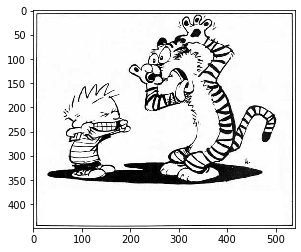

In [6]:
plt.imshow(myimBW,cmap=plt.cm.gray)

In [ ]:
# Image binarisée
myimBin = (myimBW >0.5)*1
im = myimBin.reshape(myimBin.shape[0]*myimBin.shape[1])

Votre travail
  1. Implémenter la fonction **Encode** qui à partir d'une image prépare le message à transmettre
  2. Implémenter la fonction **Transmit**, qui va, à partir un message à transmettre, émuler le canal bruité symmétrique de paramètre $f$
  3. Implémenter la fonction **Decodage**, qui va débruiter à partir du message reçu, reconstitué au mieux le signal envoyé

In [9]:

def Encode(myim,r):
    # TODO

In [11]:
def Transmit(myim,f):
    # TODO

In [13]:
def Decodage(ts,r):
    # TODO
    

In [15]:
# TEST
encR1_01 = Encode(im,1)
trR1_01 = Transmit(encR1_01,0.1)
decR1_01 = Decodage(trR1_01,1)

encR3_01 = Encode(im,3)
trR3_01 = Transmit(encR3_01,0.1)
decR3_01 = Decodage(trR3_01,1)

In [ ]:
f,ax = plt.subplots(1,4,figsize=(20,10))
ax[0].imshow(myimBin,cmap=plt.cm.gray)
ax[1].imshow(decR1_01.reshape(myimBin.shape),cmap=plt.cm.gray)
ax[2].imshow(decR3_01.reshape(myimBin.shape),cmap=plt.cm.gray)

Maintenant, 

  1. Calculer le taux d'erreur théorique pour chaque code $R_N$ à l'aide de la fonction **ErrorRate**
  2. Vous tracerez le taux d'erreur en fonction de la longueur (Rate) du code pour $n$ allant de 1 à 60.

In [17]:
import scipy.special

In [18]:
# compute rate of error
def ErrorRate(r,f):
    # TODO

#### Bonus: Hamming code

On peut construire des code utilisant la parité du message afin de reconstuire une sortie bruitée. Prenons le cas du code de Hamming.
Pour un ensemble de $4$ bits : $s_1 s_2 s_3 s_4$, le message transmis fait 7 bits. Les 4 premiers bits correspondent au message $\vec{s}$, les trois suivants à la parité suivante

  * $t_5 = s_1 + s_2 + s_3 \;\; {\rm mod} \; 2$
  * $t_6 = s_2 + s_3 + s_4 \;\; {\rm mod} \; 2$
  * $t_7 = s_3 + s_4 + s_1 \;\; {\rm mod} \; 2$
  
Donc, le message à transmettre peut se transmettre à l'aide de l'opération matricielle suivante

$$
  \vec{t} = G \vec{s}\; {\rm mod} \; 2
$$

avec 

$$
  G = \left[ \begin{array}{cccc}
      1 & 0 & 0 & 0 \\
      0 & 1 & 0 & 0 \\
      0 & 0 & 1 & 0 \\
      0 & 0 & 0 & 1 \\
      1 & 1 & 1 & 0 \\
      0 & 1 & 1 & 1 \\
      1 & 0 & 1 & 1
    \end{array}
    \right]
$$

  1. Vérifier que l'opération matricielle donne bien le résultat voulu
  2. Implémenter la fonction encodant un message, vous ferez attention de rajouter des bits à la fin du message pour obtenir un multiple de 4

Afin de décoder le message, il faut regarder ce qu'il se passe lorsque le message ne respecte pas la règle de parité. Il va falloir regarder tous le cas possibles. Examinons un cas particulier, votre travail consistera à regarder les autres cas.

On reçois donc un message $\vec{r} = r_1 r_2 r_3 r_4 r_5 r_6 r_7$. Ce message pour être correct doit vérifier les règles de parité enoncés ci-dessus. Notons $z_1$ la variable valant $0$ si la partié liée à $r_5$ est vérifiée, et $1$ sinon (on aura respectivement $z_2$ et $z_3$).

Regardons le cas où $z_1=1$, c'est à dire que l'égalité suivante n'est plus vérifiée

$$
  r_5 = r_1 + r_2 + r_3 \;\; {\rm mod} \; 2
$$

L'évènement le plus probable est qu'un bit parmi ceux reçus a été changé (le cas où plus d'un bit a été changé est moins probable). Il faut donc chercher parmi tous les bits $\vec{r}$ celui qui permet de satisfaire les équations de parité de nouveau.
L'unique solution est de considérer que c'est le bit $r_5$ qui a été changé, tout autre choix induit une erreur sur une autre des équations de parité.

Vous compléterez à l'aide du tableau suivant tous les cas possibles

|$z_1 z_2 z_3$ | 000 | 001 | 010 | 011 | 100 | 101 | 110 | 111 |
|--------------|-----|-----|-----|-----|-----|-----|-----|-----|
|  Bit pb      | ... | ... | ... | ... | $r_5$ | ... | ... | ... |


Une fois le tableau complété, écrire une fonction permettant de décoder un message


In [ ]:
def Decode_Hamming(r,G):
    # TODO

Mettez en place la transmission et le décodage selon le code de Hamming. Tester votre code sur l'image utilisée précédemment.